<div class="alert alert-block alert-warning">

<h1>Audi</h1>
    
<a href="https://www.kaggle.com/datasets/mysarahmadbhat/audi-used-car-listings">Kaggle Link</a>

</div>

<hr>

<div class="alert alert-block alert-info">
    <h2>Columns</h2>
    <p><strong>Model:</strong> Audi model.</p>
    <p><strong>Year:</strong> Registration year.</p>
    <p><strong>Price:</strong> Price in Euros.</p>
    <p><strong>Transmission:</strong> Type of gear box.</p>
    <p><strong>Mileage:</strong> Distance used.</p>
    <p><strong>Fuel Type:</strong> Engine fuel.</p>
    <p><strong>Tax:</strong> Road tax.</p>
    <p><strong>MPG:</strong> Miles per galoon.</p>
    <p><strong>Engine Size:</strong> Size in litres.</p>
</div>

## Importing Libraries

In [1]:
# !pip install plotly
# !pip install cufflinks

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:
from plotly.offline import init_notebook_mode,iplot
import cufflinks as cf

init_notebook_mode(connected = True)
cf.go_offline()

In [4]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,GridSearchCV

In [5]:
import pickle

## Importing Dataset

In [6]:
audi = pd.read_csv('audi.csv')
df = audi.copy()
df.columns = map(str.lower,df.columns)

In [7]:
df['model'] = df['model'].apply(str.strip)

In [8]:
df.head()

,model,year,price,transmission,mileage,fueltype,tax,mpg,enginesize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


## E.D.A and Data Cleaning

In [9]:
df.shape

(10668, 9)

In [10]:
df.isnull().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fueltype        0
tax             0
mpg             0
enginesize      0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fueltype      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   enginesize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


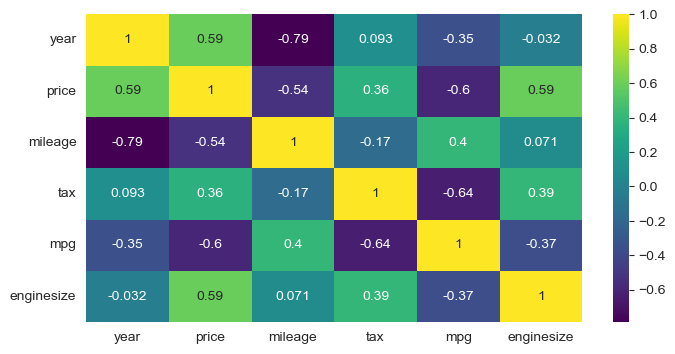

In [12]:
plt.figure(figsize = (8,4))
sns.heatmap(df.corr(),annot = True,annot_kws = {'size':10},cmap = 'viridis')
plt.yticks(rotation = 'horizontal')
plt.show()

- The number of car models less than 300 will be assign as 'other'.

In [13]:
def shorten_models(models,cutoff):
    model_map = {}
    for i in range(len(models)):
        if models.values[i] >= cutoff:
            model_map[models.index[i]] = models.index[i]

        else:
            model_map[models.index[i]] = "Other"
            
    return model_map


model_map = shorten_models(df['model'].value_counts(),300)
df['model'] = df['model'].map(model_map)

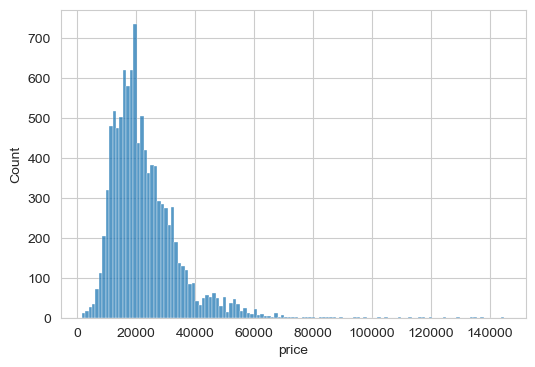

In [14]:
plt.figure(figsize = (6,4))
sns.histplot(x = 'price',data = df)
plt.show()

In [15]:
models = df.groupby('model').mean()
models['price'].iplot(colors = ['blue'],title = "The Average Price of Each Model"
                      ,xTitle = 'Models',yTitle = 'Average Price',kind = 'bar') 

In [16]:
models['tax'].iplot(colors = ['red'],title = "Average Tax Price by Models"
                      ,xTitle = 'Models',yTitle = 'Average Tax',kind = 'bar') 

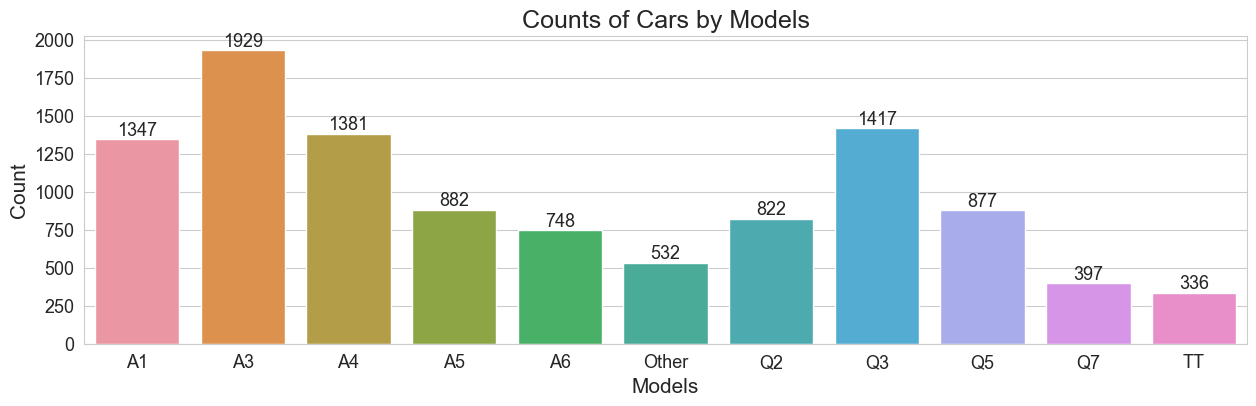

In [17]:
model_order = df['model'].sort_values().unique()

plt.figure(figsize = (15,4))

ax = sns.countplot(x = 'model',data = df,order = model_order)
ax.bar_label(ax.containers[0],size = 13)
plt.xlabel('Models',size = 15)

plt.xticks(size = 13)
plt.ylabel('Count',size = 15)
plt.yticks(size = 13)

plt.title('Counts of Cars by Models',size = 18)
plt.show()

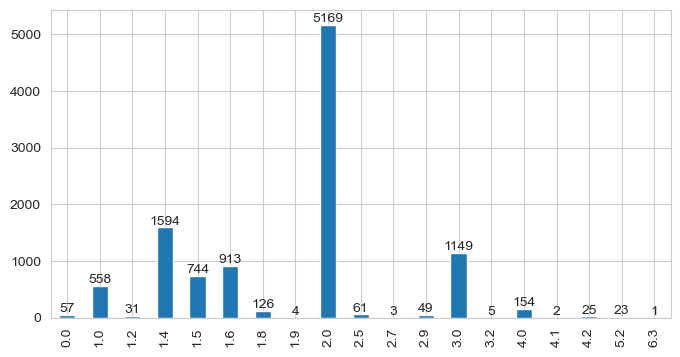

In [18]:
plt.figure(figsize = (8,4))
ax = df['enginesize'].value_counts().sort_index().plot.bar()
ax.bar_label(ax.containers[0])
plt.show()

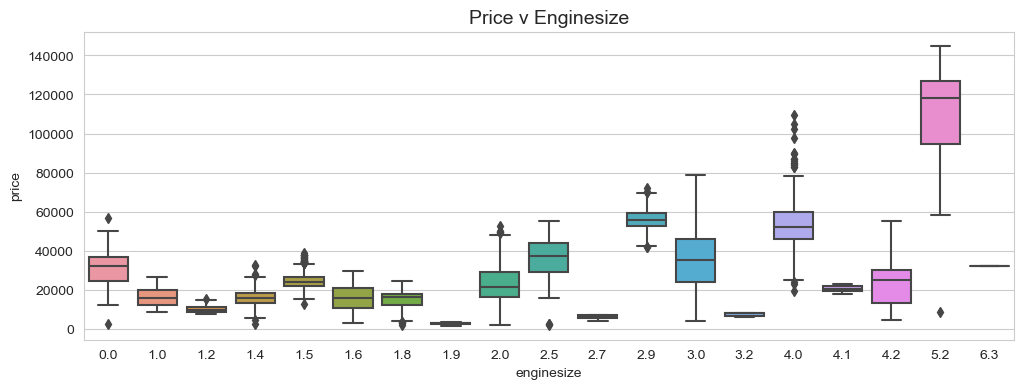

In [19]:
plt.figure(figsize = (12,4))
sns.boxplot(x = 'enginesize',y = 'price',data = df)
plt.title('Price v Enginesize',size = 14)
plt.show()

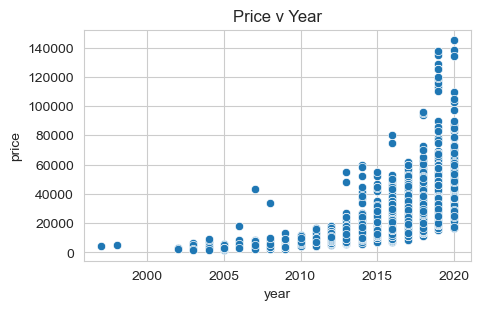

In [20]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = 'year',y = 'price',data= df)
plt.title('Price v Year')
plt.show()

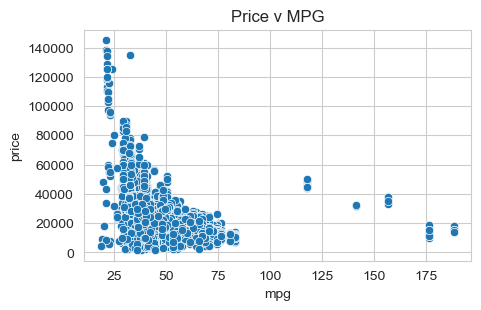

In [21]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = 'mpg',y = 'price',data = df)
plt.title('Price v MPG')
plt.show()

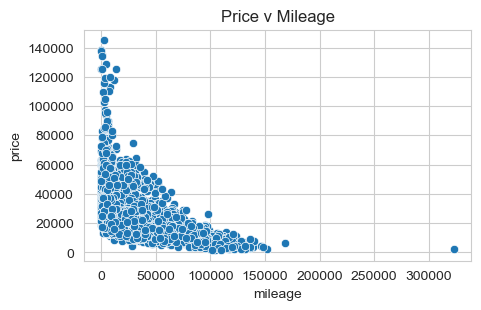

In [22]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = 'mileage',y = 'price',data = df)
plt.title('Price v Mileage')
plt.show()

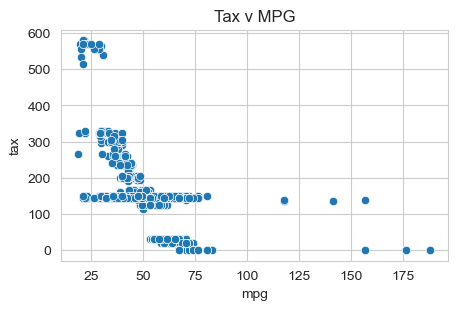

In [23]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = 'mpg',y = 'tax',data = df)
plt.title("Tax v MPG")
plt.show()

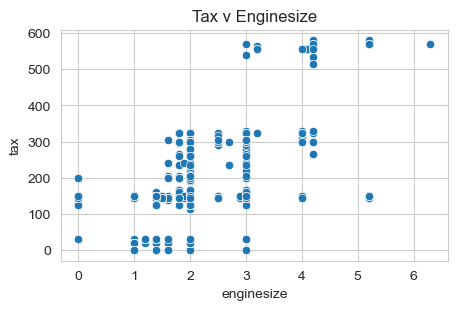

In [24]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = 'enginesize',y = 'tax',data = df)
plt.title("Tax v Enginesize")
plt.show()

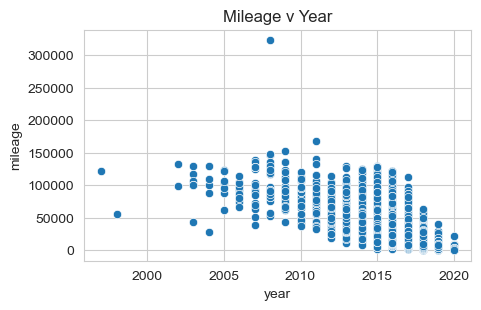

In [25]:
plt.figure(figsize = (5,3))
sns.scatterplot(x = 'year',y = 'mileage',data = df)
plt.title('Mileage v Year')
plt.show()

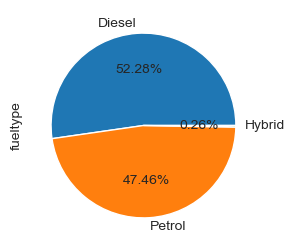

In [26]:
plt.figure(figsize = (5,3))
df['fueltype'].value_counts().plot.pie(autopct = '%.2f%%')
plt.show()

In [27]:
df = df[df['fueltype'] != 'Hybrid']

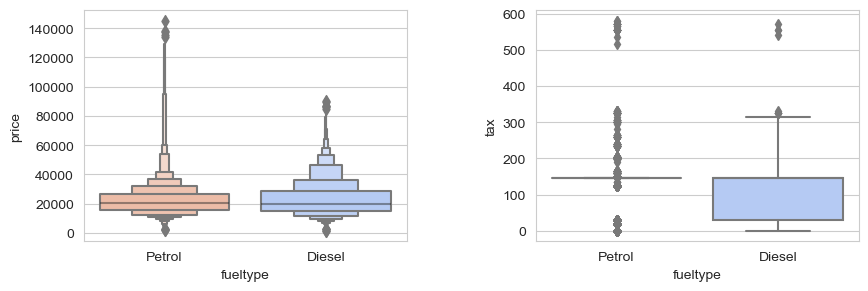

In [28]:
plt.figure(figsize= (10,3))

plt.subplot(1,2,1)
sns.boxenplot(x="fueltype", y="price",data=df,palette = 'coolwarm_r')

plt.subplot(1,2,2)
sns.boxplot(x="fueltype", y="tax",data=df,palette = 'coolwarm_r')

plt.subplots_adjust(wspace = 0.4)

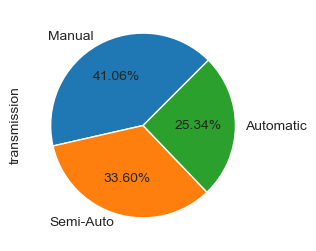

In [29]:
plt.figure(figsize = (5,3))
df['transmission'].value_counts().plot.pie(autopct = '%.2f%%',startangle = 45)
plt.show()

## Creating Variables

In [30]:
X = df.drop(['model','transmission','price'],axis = 1).values
y = df['price'].values

In [31]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

### Encoding the Fuel Type Values

In [32]:
le_fueltype = LabelEncoder()
X_train[:,2] = le_fueltype.fit_transform(X_train[:,2])
X_test[:,2] = le_fueltype.transform(X_test[:,2])

In [33]:
print(f"0 = {le_fueltype.classes_[0]}\n1 = {le_fueltype.classes_[1]}")

0 = Diesel
1 = Petrol


### Apply Standard Scaler to the X_train and X_test

In [34]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Creating Machine Learning Models

In [35]:
def calculate_scores(model,y_pred):
    r2 = round(r2_score(y_test,y_pred),2)
    mae = round(mean_absolute_error(y_test,y_pred),2)
    rmse = round(np.sqrt(mean_squared_error(y_test,y_pred)),2)
    
    cvs = cross_val_score(model,X_train,y_train,cv = 5)
    cvs = round(cvs.max(),2)
    print(f"Root Mean Squared Error: {rmse}\nMean Absolute Error: {mae}\nCross Validation Score: {cvs}\nR2 Score: {r2}")

In [36]:
def grid_search(model,params):
    gs = GridSearchCV(estimator=model,param_grid=params,cv = 5)
    gs.fit(X_train,y_train)
    print(gs.best_params_)
    return gs.best_estimator_

### Random Forest

In [37]:
random_forest_model = RandomForestRegressor(random_state=0)
random_forest_model.fit(X_train,y_train)
y_pred = random_forest_model.predict(X_test)
calculate_scores(random_forest_model,y_pred)

Root Mean Squared Error: 2733.49
Mean Absolute Error: 1846.51
Cross Validation Score: 0.94
R2 Score: 0.94


#### Random Forest Model Tuning

In [38]:
random_forest_model = RandomForestRegressor(random_state=0)
random_forest_params = {'max_depth':[None,3,4,5],'n_estimators':[100,200]}
random_forest_tuned_model = grid_search(random_forest_model,random_forest_params)

{'max_depth': None, 'n_estimators': 100}


In [39]:
random_forest_tuned_model.fit(X_train,y_train)
y_pred = random_forest_tuned_model.predict(X_test)
calculate_scores(random_forest_tuned_model,y_pred)

Root Mean Squared Error: 2733.49
Mean Absolute Error: 1846.51
Cross Validation Score: 0.94
R2 Score: 0.94


### Decision Tree

In [40]:
decision_tree_model = DecisionTreeRegressor(random_state=0)
decision_tree_model.fit(X_train,y_train)
y_pred = decision_tree_model.predict(X_test)
calculate_scores(decision_tree_model,y_pred)

Root Mean Squared Error: 3405.19
Mean Absolute Error: 2263.95
Cross Validation Score: 0.92
R2 Score: 0.91


#### Decision Tree Model Tuning

In [41]:
decision_tree_model = DecisionTreeRegressor(random_state=0,)
decision_tree_params = {'max_depth':[None,1,2,3,4],'min_samples_split':[2,3,4]}
decision_tree_tuned_model = grid_search(decision_tree_model,decision_tree_params)

{'max_depth': None, 'min_samples_split': 4}


In [42]:
decision_tree_tuned_model.fit(X_train,y_train)
y_pred = decision_tree_tuned_model.predict(X_test)
calculate_scores(decision_tree_tuned_model,y_pred)

Root Mean Squared Error: 3329.25
Mean Absolute Error: 2213.85
Cross Validation Score: 0.93
R2 Score: 0.91


### K Nearest Neighbors

In [43]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train,y_train)
y_pred = knn_model.predict(X_test)
calculate_scores(knn_model,y_pred)

Root Mean Squared Error: 2974.62
Mean Absolute Error: 1996.0
Cross Validation Score: 0.93
R2 Score: 0.93


#### K Nearest Neighbors Model Tuning

In [44]:
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_params = {'n_neighbors':np.arange(1,50,2)}
knn_tuned_model = grid_search(knn_model,knn_params)

{'n_neighbors': 7}


In [45]:
knn_tuned_model.fit(X_train,y_train)
y_pred = knn_tuned_model.predict(X_test)
calculate_scores(knn_tuned_model,y_pred)

Root Mean Squared Error: 2953.04
Mean Absolute Error: 1980.85
Cross Validation Score: 0.93
R2 Score: 0.93


### LightGBM

In [46]:
lgbm_model = LGBMRegressor(random_state=0)
lgbm_model.fit(X_train,y_train)
y_pred = lgbm_model.predict(X_test)
calculate_scores(lgbm_model,y_pred)

Root Mean Squared Error: 2656.93
Mean Absolute Error: 1850.94
Cross Validation Score: 0.95
R2 Score: 0.95


#### LightGBM Model Tuning

In [47]:
lgbm_model = LGBMRegressor(random_state=0)
lgbm_params = {'n_estimators':[100,200,500],'learning_rate':[0.1,0.2,0.3],'max_depth':[-1,1,2,3]}
lgbm_tuned_model = grid_search(lgbm_model,lgbm_params)

{'learning_rate': 0.2, 'max_depth': -1, 'n_estimators': 200}


In [48]:
lgbm_tuned_model.fit(X_train,y_train)
y_pred = lgbm_tuned_model.predict(X_test)
calculate_scores(lgbm_tuned_model,y_pred)

Root Mean Squared Error: 2591.22
Mean Absolute Error: 1802.11
Cross Validation Score: 0.95
R2 Score: 0.95


### XGBoost

In [49]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
calculate_scores(xgb_model,y_pred)

Root Mean Squared Error: 2559.2
Mean Absolute Error: 1805.05
Cross Validation Score: 0.95
R2 Score: 0.95


#### XGBoost Model Tuning

In [50]:
xgb_model = XGBRegressor()
xgb_params = {
     'n_estimators':[100, 200, 500],
     'max_depth': [None,2, 3],
     'learning_rate': [0.1, 0.2]
}
xgb_tuned_model = grid_search(xgb_model,xgb_params)

{'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 500}


In [51]:
xgb_tuned_model.fit(X_train,y_train)
y_pred = xgb_tuned_model.predict(X_test)
calculate_scores(xgb_tuned_model,y_pred)

Root Mean Squared Error: 2568.81
Mean Absolute Error: 1831.65
Cross Validation Score: 0.95
R2 Score: 0.95


### Multiple Linear Regression

In [52]:
multiple_linear_reg_model = LinearRegression()
multiple_linear_reg_model.fit(X_train,y_train)
y_pred = multiple_linear_reg_model.predict(X_test)
calculate_scores(multiple_linear_reg_model,y_pred)

Root Mean Squared Error: 5064.15
Mean Absolute Error: 3346.06
Cross Validation Score: 0.83
R2 Score: 0.8


## Plotting Models' Performance

In [53]:
machine_learning_models = {
    'Random Forest':random_forest_tuned_model,
    'Decision Tree':decision_tree_tuned_model,
    'KNN':knn_tuned_model,
    'LightGBM':lgbm_tuned_model,
    'XGBoost':xgb_tuned_model,
    'Multiple Lin. Reg':multiple_linear_reg_model
}

In [54]:
data = {}
for i in machine_learning_models:
    y_pred = machine_learning_models[i].predict(X_test)
    rmse = round(np.sqrt(mean_squared_error(y_test,y_pred)),2)
    data[i] = rmse
    
# sorting the data
data = dict(sorted(data.items(), key=lambda data: data[1]))

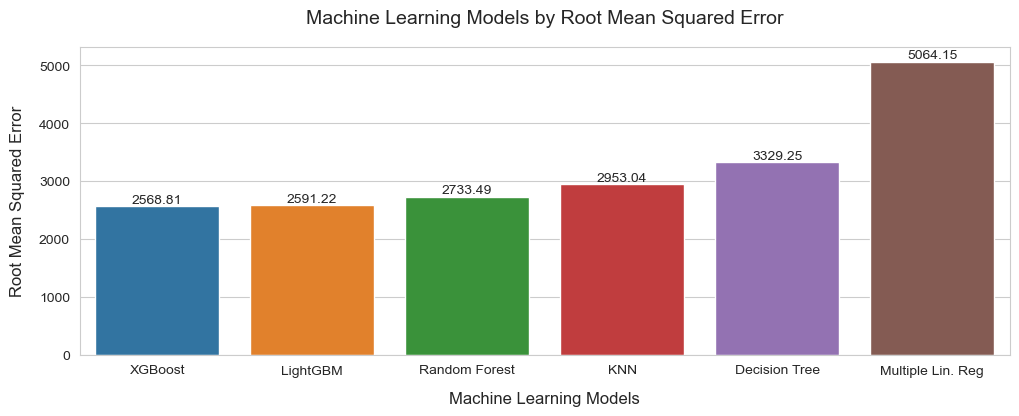

In [55]:
names = list(data.keys())
values = list(data.values())
plt.figure(figsize = (12,4))
ax = sns.barplot(x = names,y = values)
ax.bar_label(ax.containers[0])
plt.xlabel("Machine Learning Models",size = 12,labelpad = 10)
plt.ylabel("Root Mean Squared Error",size = 12,labelpad=10)
plt.title("Machine Learning Models by Root Mean Squared Error",size = 14,y = 1.05)
plt.show()

## Save Data

In [56]:
data_to_be_saved = {'model':xgb_tuned_model,'le_fueltype':le_fueltype,'scaler':scaler}
with open("saved_data.pkl",'wb') as file:
    pickle.dump(data_to_be_saved,file)

## Load Data

In [57]:
with open('saved_data.pkl','rb') as file:
    saved_data = pickle.load(file)